In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo o conjunto de dados de um arquivo CSV
df = pd.read_csv("houses_to_rent_v2.csv")

In [ ]:
# Primeiras linhas do conjunto de dados

df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
# Informações gerais do conjunto de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
# Estatísticas descritivas

df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
# Verifica se há valores nulos em cada coluna do conjunto de dados

df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [ ]:
# Removendo as linhas duplicadas

df = df.drop_duplicates()

<ipython-input-7-20944a75e768>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes = df.corr()


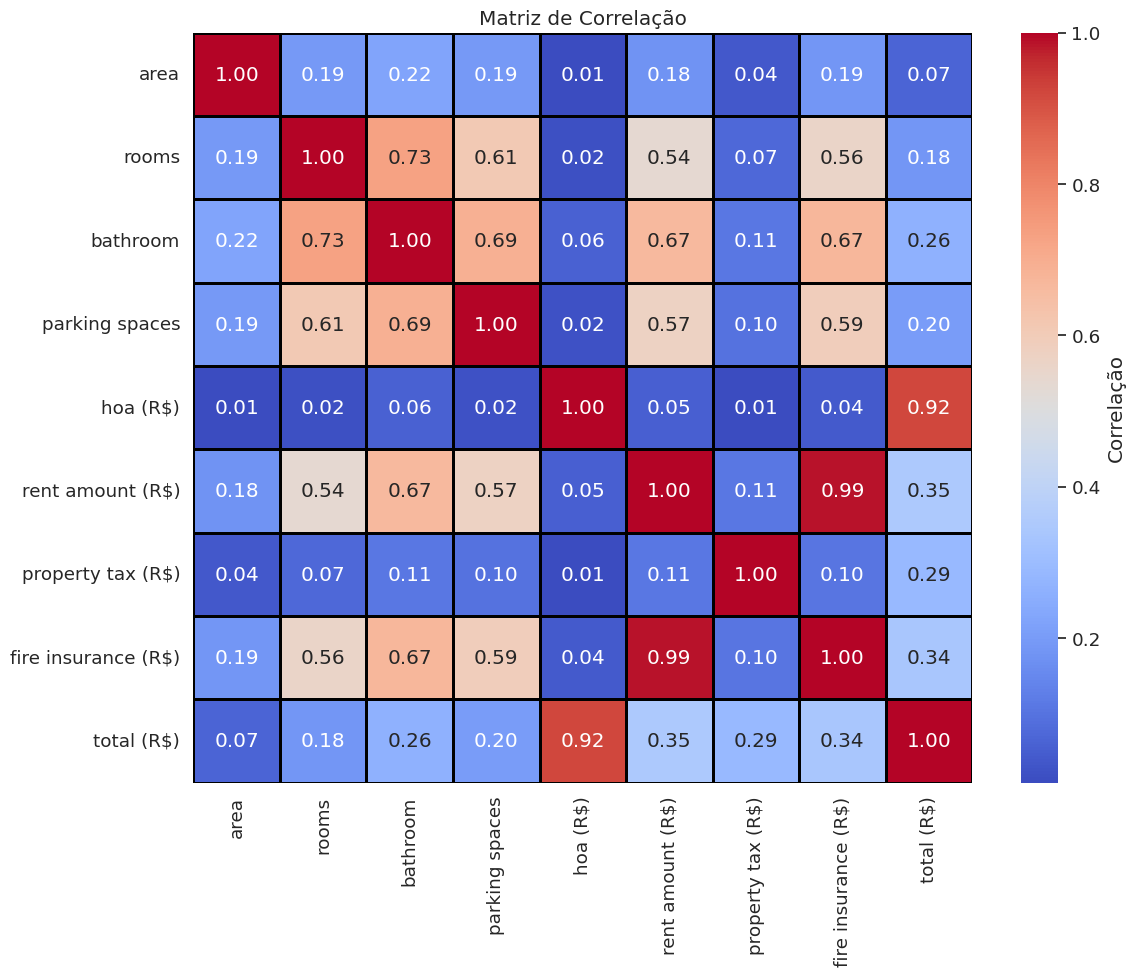

In [ ]:
# Correlação entre variáveis

correlacoes = df.corr()

plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

heatmap = sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black', cbar_kws={'label': 'Correlação'})

plt.title('Matriz de Correlação')

plt.tight_layout()

plt.show()

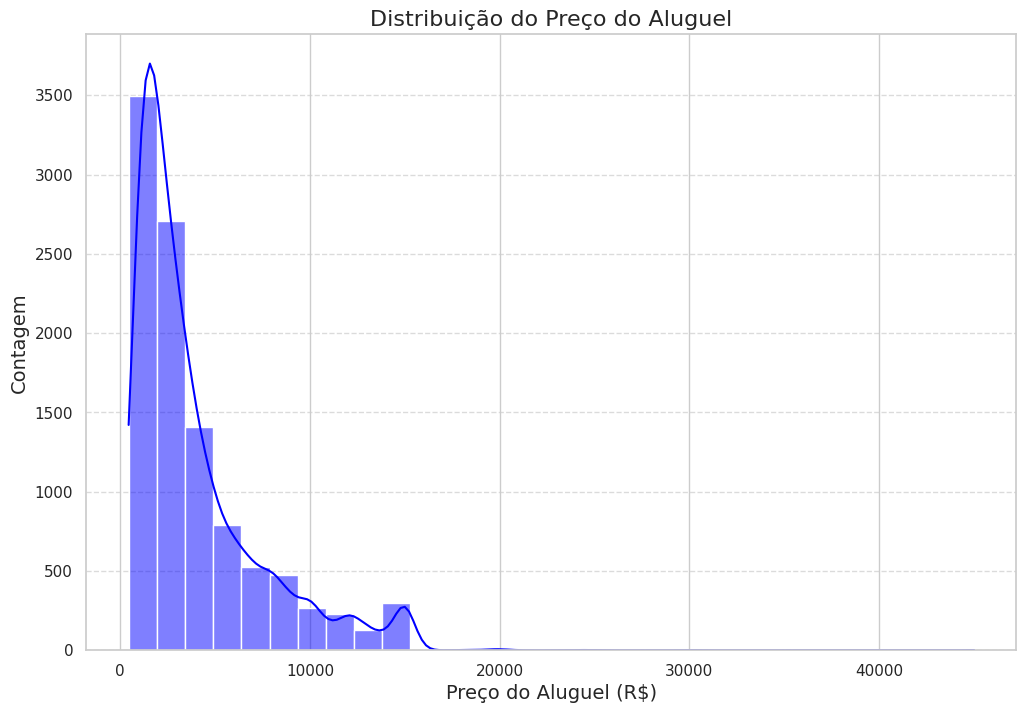

In [ ]:
# Histograma para o preço do aluguel

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.histplot(df['rent amount (R$)'], kde=True, color='blue', bins=30)

plt.title('Distribuição do Preço do Aluguel', fontsize=16)
plt.xlabel('Preço do Aluguel (R$)', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# Tratamento de outliers
from scipy.stats import zscore

df['z_scores'] = df.groupby('city')['rent amount (R$)'].transform(zscore)

outlier_limit = 3

filtered_data = df[abs(df['z_scores']) <= outlier_limit].copy()

filtered_data.drop(columns='z_scores', inplace=True)

outliers_removed = len(df) - len(filtered_data)
print(f"Outliers removidos: {outliers_removed}")

Outliers removidos: 148


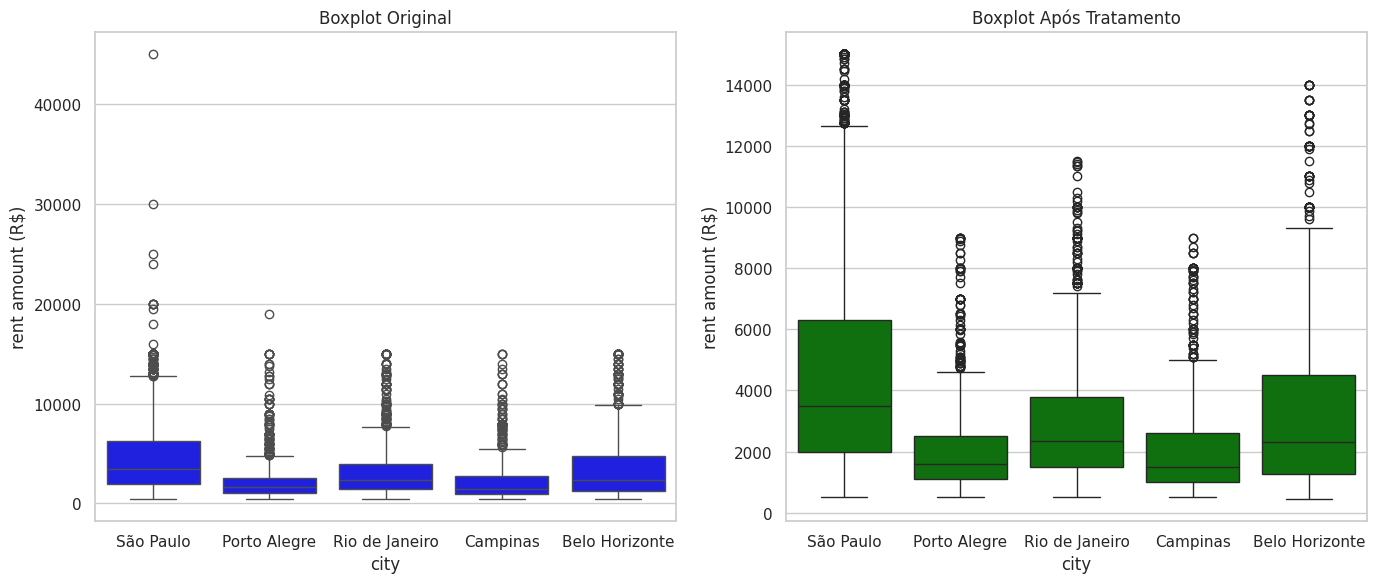

In [ ]:
# Boxplot antes do tratamento
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='city', y='rent amount (R$)', data=df, color='blue')
plt.title('Boxplot Original')

# Boxplot após o tratamento
plt.subplot(1, 2, 2)
sns.boxplot(x='city', y='rent amount (R$)', data=filtered_data, color='green')
plt.title('Boxplot Após Tratamento')

plt.tight_layout()
plt.show()

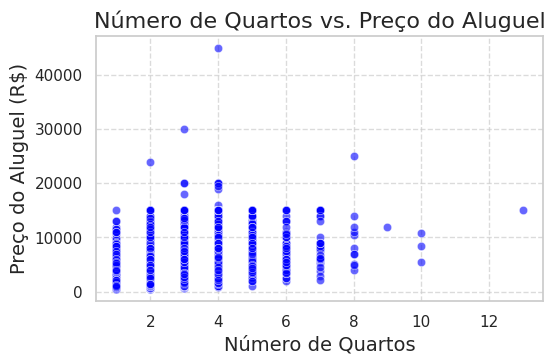

In [ ]:
# Gráfico de dispersão para números de quartos vs. preço do aluguel

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)

sns.scatterplot(x='rooms', y='rent amount (R$)', data=df, alpha=0.6, color='blue')

plt.title('Número de Quartos vs. Preço do Aluguel', fontsize=16)
plt.xlabel('Número de Quartos', fontsize=14)
plt.ylabel('Preço do Aluguel (R$)', fontsize=14)

plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

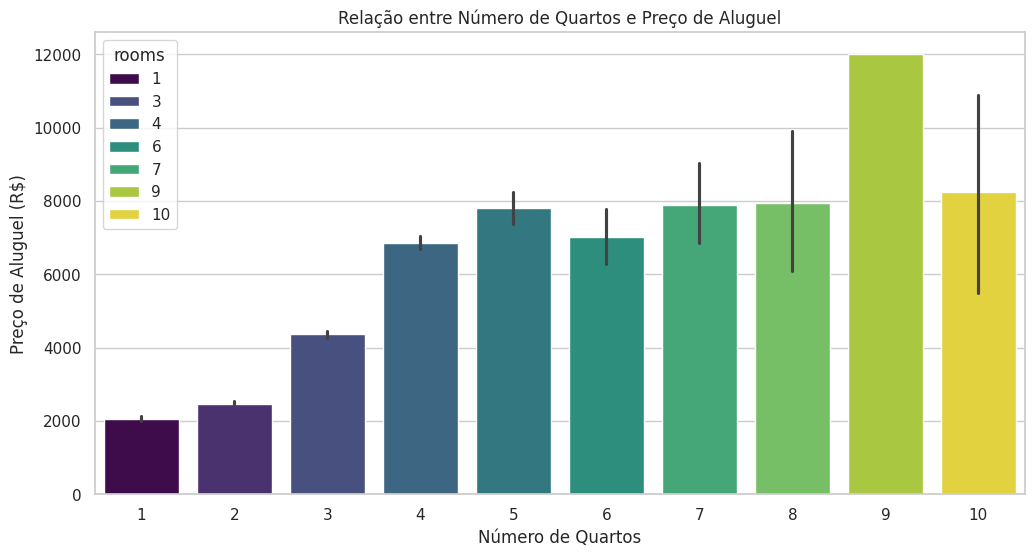

In [ ]:
# Gráfico de barras para números de quartos vs. preço do aluguel

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='rooms', y='rent amount (R$)', hue='rooms', data=filtered_data, palette='viridis', dodge=False)
plt.title('Relação entre Número de Quartos e Preço de Aluguel')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço de Aluguel (R$)')
plt.show()

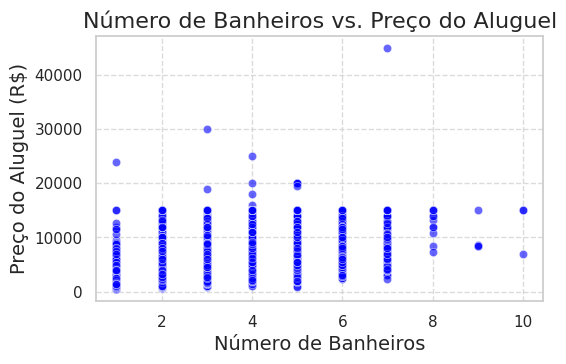

In [ ]:
# Gráfico de dispersão para número de banheiros vs. preço do aluguel

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)

sns.scatterplot(x='bathroom', y='rent amount (R$)', data=df, alpha=0.6, color='blue')

plt.title('Número de Banheiros vs. Preço do Aluguel', fontsize=16)
plt.xlabel('Número de Banheiros', fontsize=14)
plt.ylabel('Preço do Aluguel (R$)', fontsize=14)

plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

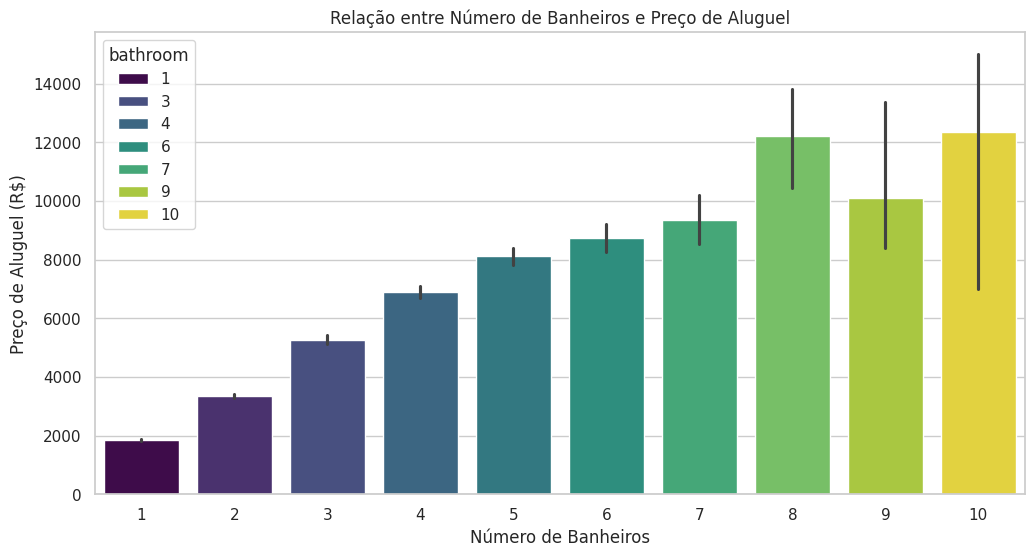

In [ ]:
# Gráfico de barras para número de banheiros vs. preço do aluguel

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='bathroom', y='rent amount (R$)', hue='bathroom', data=filtered_data, palette='viridis', dodge=False)
plt.title('Relação entre Número de Banheiros e Preço de Aluguel')
plt.xlabel('Número de Banheiros')
plt.ylabel('Preço de Aluguel (R$)')
plt.show()

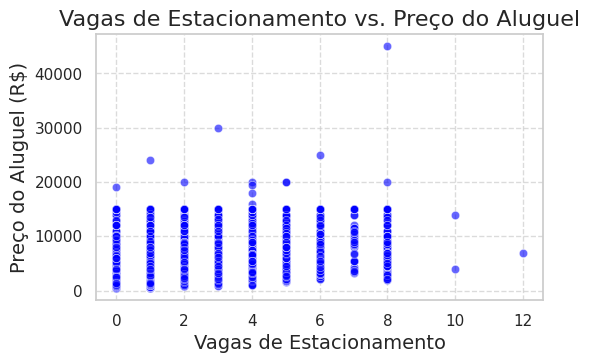

In [ ]:
# Gráfico de dispersão para vagas de estacionamento vs. preço do aluguel

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)

sns.scatterplot(x='parking spaces', y='rent amount (R$)', data=df, alpha=0.6, color='blue')

plt.title('Vagas de Estacionamento vs. Preço do Aluguel', fontsize=16)
plt.xlabel('Vagas de Estacionamento', fontsize=14)
plt.ylabel('Preço do Aluguel (R$)', fontsize=14)

plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

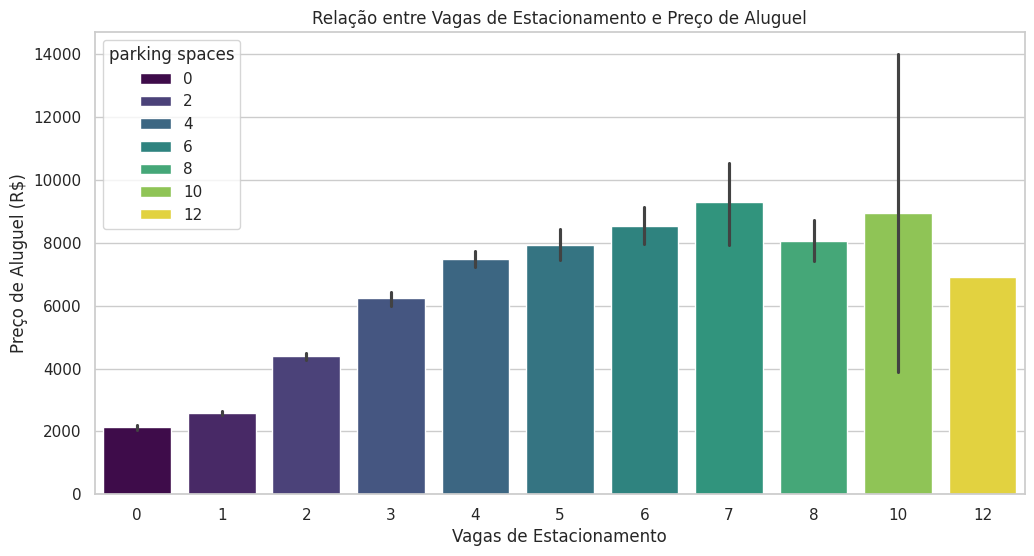

In [ ]:
# Gráfico de barras para vagas de estacionamento vs. preço do aluguel

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='parking spaces', y='rent amount (R$)', hue='parking spaces', data=filtered_data, palette='viridis', dodge=False)
plt.title('Relação entre Vagas de Estacionamento e Preço de Aluguel')
plt.xlabel('Vagas de Estacionamento')
plt.ylabel('Preço de Aluguel (R$)')
plt.show()

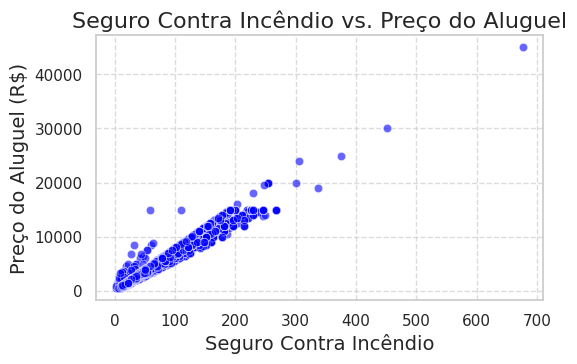

In [ ]:
# Gráfico de dispersão para seguro contra incêndio vs. preço do aluguel

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)

sns.scatterplot(x='fire insurance (R$)', y='rent amount (R$)', data=df, alpha=0.6, color='blue')

plt.title('Seguro Contra Incêndio vs. Preço do Aluguel', fontsize=16)
plt.xlabel('Seguro Contra Incêndio', fontsize=14)
plt.ylabel('Preço do Aluguel (R$)', fontsize=14)

plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [ ]:
# Importando as bibliotecas necessárias para a criação e avaliação do modelo de regressão linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Divisão dos dados em conjuntos de treinamento e teste
X = filtered_data[['city','rooms','bathroom','parking spaces','fire insurance (R$)']]
y = filtered_data['rent amount (R$)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
# Criando transformadores para variáveis numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

In [ ]:
# Aplicando transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
model = LinearRegression()

# Criando um pipeline que aplica a transformação e treina o modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [ ]:
# Treinando o modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['rooms', 'bathroom', 'parking spaces', 'fire insurance (R$)'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['city'], dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
# Avaliando o modelo

# Calculando o R² Score
score = pipeline.score(X_test, y_test)
print(f'R² Score: {score}')

# Calculando o RMSE
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print(f'RMSE: {rmse}')

# Calculando o MAE
MAE = mean_absolute_error(y_test, y_pred)
print(f'MAE: {MAE}')

R² Score: 0.9800297847177433
RMSE: 21.622113556819574
MAE: 311.0871868229534
